<a href="https://colab.research.google.com/github/Danieljuarez-cmd/Investigaci-n-de-Operaciones-/blob/main/Problemas_de_redes_con_la_librer%C3%ADa_networkx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dibujo de redes**

*Edgar Daniel Juárez Parangueo*

La libreria que se importa a continuación sirve para crear, analizar y manipular redes complejas de mnera facil.

In [16]:
import networkx as nx #Importa la librería necesaria para crear los grafos
import matplotlib.pyplot as plt #Esta libreria nos ayuda a dibujar mas facilmente las redes


A continuación creamos  primero una red vacia para crear directamente la gráfica que vamos a utilizar


In [17]:
G=nx.DiGraph()#Creamos un grafo dirigido con la variable G

A continuacion se crean los arcos que unen a un nodo con otro, es aqui donde podemos crear tantos como se nos solicite.

In [18]:
#Ingresamos los nodos correspondientes, donde se unen mediante un arco
G.add_edge("A","B")
G.add_edge("B","C")
G.add_edge("B","D")
G.add_edge("A","C")
G.add_edge("C","D")

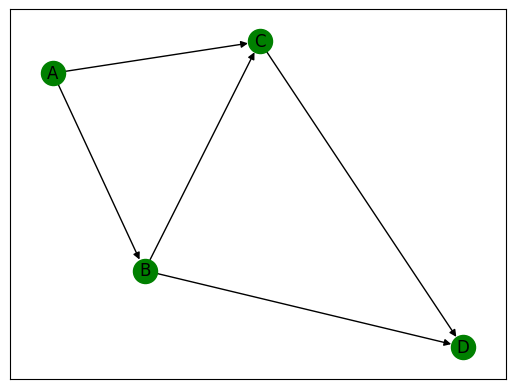

In [19]:
nx.draw_networkx(G, node_color="green")#Muestra la red dibujada con el color correspondinte ajustable.


Podemos imprimir la lista de los nodos que utilizamos en el grafo.

In [20]:
list(G.nodes)#Genera la lista de nodos del grafo

['A', 'B', 'C', 'D']

Tambien se puede pedir que se nos muestren los nodos que se utilizaron en esta red

In [21]:
nx.nodes(G)#Se nos muestran los nodos que se ingresaron para el grafo

NodeView(('A', 'B', 'C', 'D'))

Aqui podemos mostrar las aristas de los grafos, agrupadas como una coordenada (x,y) con x punto de partida, y como punto de llegada

In [22]:
nx.edges(G)#Nos muestra las esquinas del grafo o tambien llamadas aristas.

OutEdgeView([('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ('C', 'D')])

In [23]:
print(G.edges(data=True))#Nos muestra la cantidad de nodos, ademas si tuvieramos ingresada una capacidad por cada nodo se mostraría dentro de las llaves .

[('A', 'B', {}), ('A', 'C', {}), ('B', 'C', {}), ('B', 'D', {}), ('C', 'D', {})]


Mostramos el numero de nodos de la red como sigue:

In [24]:
nx.number_of_nodes(G)#Cantidad de nodos (4)

4

A continuación se describen los problemas de redes básicos.

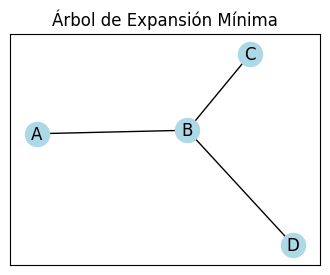

Aristas del MST con nodos: [('A', 'B', {'weight': 2}), ('B', 'D', {'weight': 1}), ('B', 'C', {'weight': 3})]


In [4]:
import networkx as nx #Importa la librería necesaria para crear los grafos
import matplotlib.pyplot as plt #Esta libreria nos ayuda a dibujar mas facilmente las redes

# Árbol de Expansión Mínima

G2 = nx.Graph() #Necesitamos un grafo no dirigido para obtener el arbol de expansión mínima
#Ingresamos los nodos a utilizar, y tambien le asignamos una capacidad
G2.add_weighted_edges_from([
    ("A", "B", 2),
    ("B", "C", 3),
    ("B", "D", 1),
    ("A", "C", 4),
    ("C", "D", 5)
])
#Añadimos la fórmula tomada de netwokrx para el árbol de expansión mínima
mst = nx.minimum_spanning_tree(G2)
#Aqui es donde entra la librería mathplotlib, para dibujar la gráfica, creamos el "lienzo" en blanco.
plt.figure(figsize=(4,3))
#Aqui se dibujan los nodos correspondientes con la libreria mathplotlib
nx.draw_networkx(mst, node_color="lightblue", with_labels=True) #Con labels se unen los nodos
#Añadimos el título correspondiente
plt.title("Árbol de Expansión Mínima")
#Mostramos o imprimimos la red
plt.show()
#Mostramos los nodos con su capacidad en lista
print("Aristas del MST con nodos:", list(mst.edges(data=True)))
#Notar que weight es la capacidad entre nodos

Ruta más corta de A a D: ['A', 'B', 'D']
Distancia mínima entre A y D: 3


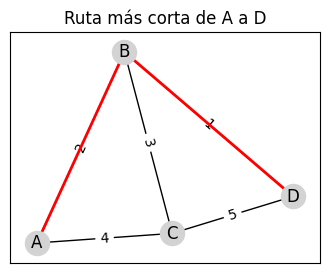

In [5]:
import networkx as nx #Importa la librería necesaria para crear los grafos
import matplotlib.pyplot as plt #Esta libreria nos ayuda a dibujar mas facilmente las redes

# Ruta más corta
ruta = nx.shortest_path(G2, source="A", target="D", weight="weight")
#Creamos la ruta, con ayuda de la libreria correspondiente, además calculamos la ruta más corta desde el nodo A hasta D (en este caso).
distancia = nx.shortest_path_length(G2, source="A", target="D", weight="weight")
#Se calcula la distancia de la ruta mas corta sumando las capacidades correspondientes.
print("Ruta más corta de A a D:", ruta)
print("Distancia mínima entre A y D:", distancia)
#Finalmente se imprime la ruta mas corta y la distancia minima.

# Dibujamos el grafo con las capacidades, donde tambien resaltamos la ruta más corta
plt.figure(figsize=(4,3))#Aqui es donde entra la librería mathplotlib, para dibujar la gráfica, creamos el "lienzo" en blanco.
pos = nx.spring_layout(G2)  # Preparamos los nodos para graficar
nx.draw_networkx(G2, pos, node_color="lightgrey", with_labels=True)
# Dibujar etiquetas de pesos
labels = nx.get_edge_attributes(G2, 'weight')
#Dibujamos el gráfico con un color para cada nodo
nx.draw_networkx_edge_labels(G2, pos, edge_labels=labels)
path_edges = list(zip(ruta, ruta[1:]))#Imprimir las etiquetas de capacidad
# Resaltamos la ruta más corta
nx.draw_networkx_edges(G2, pos, edgelist=path_edges, edge_color="red", width=2)
#Añadimos un título
plt.title("Ruta más corta de A a D")
plt.show()#Mostramios el grafo




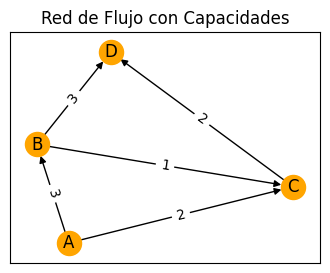

Valor del flujo máximo de A a D: 5
Distribución del flujo: {'A': {'B': 3, 'C': 2}, 'B': {'C': 0, 'D': 3}, 'C': {'D': 2}, 'D': {}}


In [7]:
import networkx as nx #Importa la librería necesaria para crear los grafos
import matplotlib.pyplot as plt #Esta libreria nos ayuda a dibujar mas facilmente las redes

# Flujo máximo
G3 = nx.DiGraph()#Necesitamos un grafo no dirigido para obtener el arbol de expansión mínima
# Colocamos aristas a cada nodo, donde tambien ponemos la capacidad de cada uno.
G3.add_edge("A", "B", capacity=3)
G3.add_edge("A", "C", capacity=2)
G3.add_edge("B", "C", capacity=1)
G3.add_edge("B", "D", capacity=3)
G3.add_edge("C", "D", capacity=2)
# Obtiene cuánto flujo pasa por cada arista
flow_value, flow_dict = nx.maximum_flow(G3, "A", "D")
#Aqui es donde entra la librería mathplotlib, para dibujar la gráfica, creamos el "lienzo" en blanco.
plt.figure(figsize=(4,3))
#Preparamos las coordenadas de los nodos para dibujar el grafo de flujo máximo.
pos = nx.spring_layout(G3)
#Dibuja el grafo dirigido del flujo con nodos de color y las flechas correspondientes.
nx.draw_networkx(G3, pos, node_color="orange", with_labels=True)
# Dibujamos las etiquetas por arista, mostramos la capacidad que se puede transportar.
labels = nx.get_edge_attributes(G3, 'capacity')
nx.draw_networkx_edge_labels(G3, pos, edge_labels=labels)
#Añadimos un título y mostramos el grafo
plt.title("Red de Flujo con Capacidades")
plt.show()
#Imprimimos el valor total del flujo máximo .
print("Valor del flujo máximo de A a D:", flow_value)
print("Distribución del flujo:", flow_dict)